In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#separating the features
X=df.drop(columns=['sales'])
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [6]:
y= df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly_conv= PolynomialFeatures(degree=2,include_bias=False)
poly_conv.fit(X)
X1= poly_conv.transform(X)
X1[0:25]
X1.shape # 9 represents the transformed features

(200, 9)

In [9]:
series= pd.DataFrame(X1)
series.head()

,0,1,2,3,4,5,6,7,8
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X1,y,test_size=0.3,random_state=101)
X_train

array([[1.93200e+02, 1.84000e+01, 6.57000e+01, ..., 3.38560e+02,
        1.20888e+03, 4.31649e+03],
       [2.87600e+02, 4.30000e+01, 7.18000e+01, ..., 1.84900e+03,
        3.08740e+03, 5.15524e+03],
       [8.02000e+01, 0.00000e+00, 9.20000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.46400e+01],
       ...,
       [2.39800e+02, 4.10000e+00, 3.69000e+01, ..., 1.68100e+01,
        1.51290e+02, 1.36161e+03],
       [2.14700e+02, 2.40000e+01, 4.00000e+00, ..., 5.76000e+02,
        9.60000e+01, 1.60000e+01],
       [1.63300e+02, 3.16000e+01, 5.29000e+01, ..., 9.98560e+02,
        1.67164e+03, 2.79841e+03]])

In [11]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
y_cap=model.predict(X_test)
y_cap

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mab_error= mean_absolute_error(y_cap,y_test)
mab_error

0.48967980448035936

In [14]:
msq_error= mean_squared_error(y_test,y_cap)
msq_error

0.44175055104033945

In [15]:
RMS=np.sqrt(msq_error)
RMS

0.6646431757269005

13.348333333333326

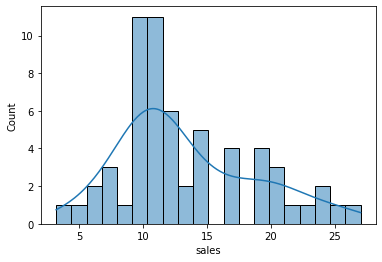

In [16]:
sns.histplot(y_test,kde=True,bins=20)
y_test.mean()

In [17]:
#finding if the model is fit for a linear model
residual= y_test-y_cap
residual.head()

37     0.751438
109    0.465197
31    -0.419282
89    -0.062863
66     1.597891
Name: sales, dtype: float64

<AxesSubplot:xlabel='sales', ylabel='Density'>

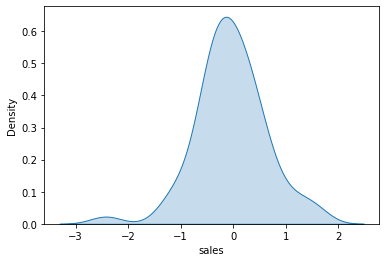

In [18]:
sns.kdeplot(x=residual,fill=True)

Text(0, 0.5, 'Residuals')

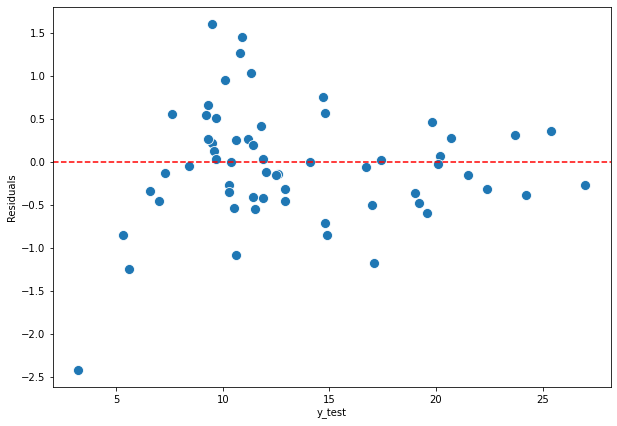

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=y_test,y=residual,s=100)
plt.axhline(y=0,color='red',ls='--') #note the number of residuals and the way they are distributed
plt.xlabel('y_test')
plt.ylabel('Residuals')

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

This training model confims that 
1. Note how the various features will change the output and what is the weightage of each coefficient

In [21]:
#finding the degree of best fit 
#we are going to compare the variation for both the model trained on the train set and the modeltrained on the test set
test_rmse=[]
train_rmse=[]
deg=[]
for i in range(1,10):
    polynomial= PolynomialFeatures(degree=i,include_bias=False)
    x=polynomial.fit_transform(X)
    x_train,x_test,y_ntrain,y_test= train_test_split(x, y, test_size=0.33, random_state=42)
    new_model= LinearRegression()
    new_model.fit(x_train,y_ntrain)
    ypredict= new_model.predict(x_test)
    y_tpredict= new_model.predict(x_train)
    tra_error= np.sqrt(mean_squared_error(y_ntrain,y_tpredict))
    train_rmse.append(tra_error)
    tes_rmse= np.sqrt(mean_squared_error(y_test,ypredict))
    test_rmse.append(tes_rmse)
    deg.append(i)

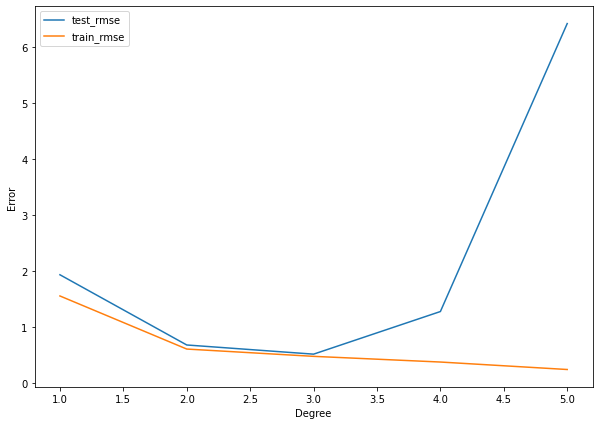

In [22]:
plt.figure(figsize=(10,7))
plt.plot(deg[:5],test_rmse[:5],label='test_rmse')
plt.plot(deg[:5],train_rmse[:5],label='train_rmse')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend()

In [27]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_model = LinearRegression()
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [28]:
from joblib import load, dump
dump(final_model,'final_model.joblib')
dump(poly_convert,'final_convert.joblib')

NameError: name 'poly_convert' is not defined

In [ ]:
load_model= load('final_model.joblib')
load_convert=load('final_convert.joblib')
campaign=[[149,22,12]]

In [ ]:
transform=load_convert.fit_transform(campaign)

In [29]:
load_model.predict(transform)
load_model.pa

NameError: name 'load_model' is not defined